In [1]:
#importing libraries 
import pandas as pd
#from fancyimpute import IterativeImputer
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pip install sweetviz

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached sweetviz-2.1.4-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-6.0.0-py3-none-any.w

In [2]:
# Load the CSV file into a DataFrame
df_imputed = pd.read_csv('df_imputed.csv')

In [3]:
df_imputed.dtypes

Frequency_Racket          float64
Duration_Racket           float64
Mins_Badminton_Perweek    float64
Badminton_Duration        float64
Badminton_12_Momths       float64
Time                        int64
IMD                       float64
Serial                    float64
LA                        float64
Age                       float64
Child                     float64
Diability                 float64
Education                 float64
Ethnicity                 float64
Gender                    float64
Workstatus                float64
BMI                       float64
Badminton_Frequency       float64
Plays_badminton           float64
Plays_racket              float64
dtype: object

In [4]:
df_imputed.dtypes

# List of continuous columns
continuous_cols = ['Frequency_Racket', 'Duration_Racket','Mins_Badminton_Perweek',
                   'Badminton_Duration','Badminton_12_Momths','Age','Time']

# Convert variables not in continuous_cols to object data type
for col in df_imputed.columns:
    if col not in continuous_cols:
        df_imputed[col] = df_imputed[col].astype('object')




# Convert variables to numeric data type
df_imputed['Plays_badminton'] = pd.to_numeric(df_imputed['Plays_badminton'], errors='coerce')
df_imputed['Plays_racket'] = pd.to_numeric(df_imputed['Plays_racket'], errors='coerce')
df_imputed['Serial'] = df_imputed['Serial'].astype("string")


# Check the data types
print(df_imputed.dtypes)

Frequency_Racket          float64
Duration_Racket           float64
Mins_Badminton_Perweek    float64
Badminton_Duration        float64
Badminton_12_Momths       float64
Time                        int64
IMD                        object
Serial                     string
LA                         object
Age                       float64
Child                      object
Diability                  object
Education                  object
Ethnicity                  object
Gender                     object
Workstatus                 object
BMI                        object
Badminton_Frequency        object
Plays_badminton           float64
Plays_racket              float64
dtype: object


## Data Exploration

/var/folders/zp/y2vlfd414295r1l6rtn8vxnc0000gn/T/ipykernel_54628/2034580252.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


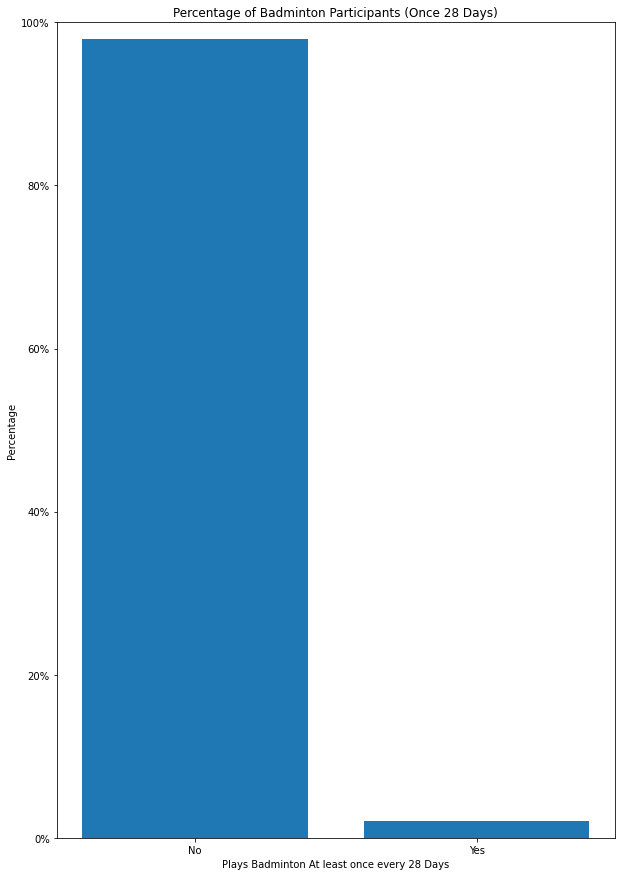

In [12]:
# Count the occurrences of 1's and 0's in the "Plays_badminton" column
value_counts = df_imputed['Plays_badminton'].value_counts(normalize=True) * 100

# Set the figure size
plt.figure(figsize=(10, 15))

# Create a bar chart
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel("Plays Badminton At least once every 28 Days")
plt.ylabel("Percentage")
plt.title("Percentage of Badminton Participants (Once 28 Days)")

# Set the y-axis limit to 100 percent
plt.ylim(0, 100)

# Add y-ticks labels as percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

# Add x-ticks labels
plt.xticks(value_counts.index, ['No', 'Yes'])

# Show the plot
plt.show()

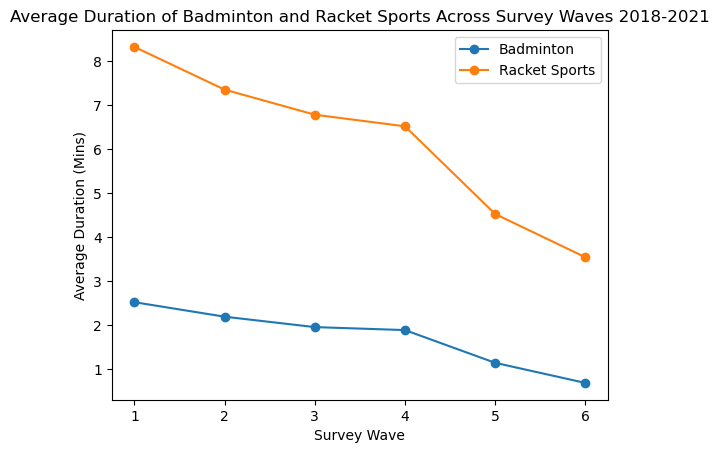

In [6]:
# Calculate the average duration of badminton and racket sports across years
avg_badminton_duration = df_imputed.groupby('Time')['Badminton_Duration'].mean()
avg_racket_sports_duration = df_imputed.groupby('Time')['Duration_Racket'].mean()

# Plot the average duration of badminton and racket sports
plt.plot(avg_badminton_duration.index, avg_badminton_duration.values, marker='o', label='Badminton')
plt.plot(avg_racket_sports_duration.index, avg_racket_sports_duration.values, marker='o', label='Racket Sports')
plt.xlabel('Survey Wave')
plt.ylabel('Average Duration (Mins)')
plt.title('Average Duration of Badminton and Racket Sports Across Survey Waves 2018-2021')
plt.legend()
plt.show()

#this decrease could be represented by the covid-lockdowns 

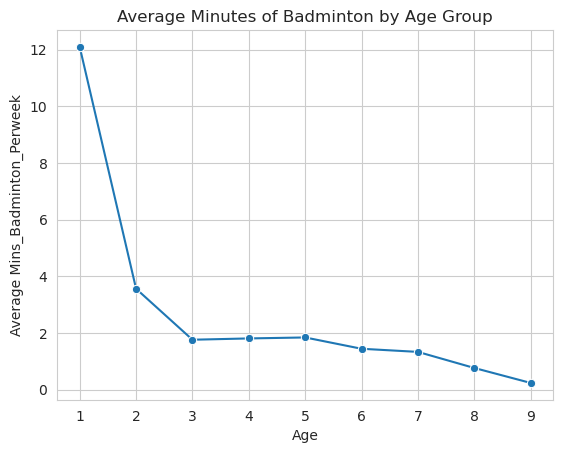

In [7]:
# Calculate the average 'Mins_Badminton_Perweek' by age
avg_mins_per_week = df_imputed.groupby('Age')['Mins_Badminton_Perweek'].mean().reset_index()

# Set seaborn style
sns.set_style("whitegrid")

# Plot the average 'Mins_Badminton_Perweek' by age
sns.lineplot(data=avg_mins_per_week, x='Age', y='Mins_Badminton_Perweek', marker='o')
plt.xlabel('Age')
plt.ylabel('Average Mins_Badminton_Perweek')
plt.title('Average Minutes of Badminton by Age Group')
plt.show()

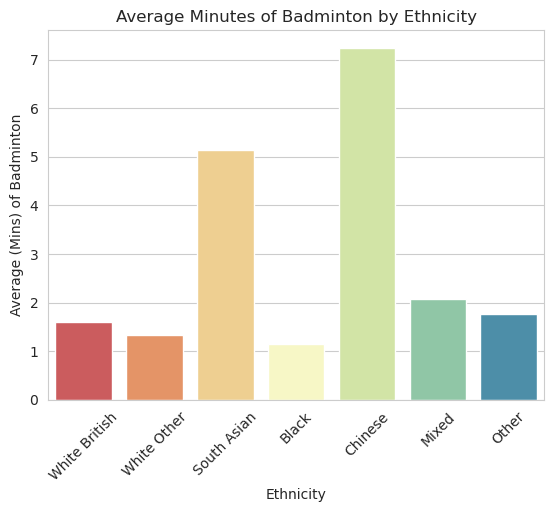

In [8]:
# Calculate the average 'Mins_Badminton_Perweek' by ethnicity
avg_mins_per_week = df_imputed.groupby('Ethnicity')['Badminton_Duration'].mean().reset_index()

# Set seaborn style
sns.set_style("whitegrid")

# Define binary labels for school meals
labels = ['White British','White Other','South Asian','Black','Chinese','Mixed','Other']


# Plot the average 'Mins_Badminton_Perweek' by ethnicity
sns.barplot(data=avg_mins_per_week, x=labels, y='Badminton_Duration', palette='Spectral')
plt.xlabel('Ethnicity')
plt.ylabel('Average (Mins) of Badminton')
plt.title('Average Minutes of Badminton by Ethnicity')
plt.xticks(rotation=45)
plt.show()

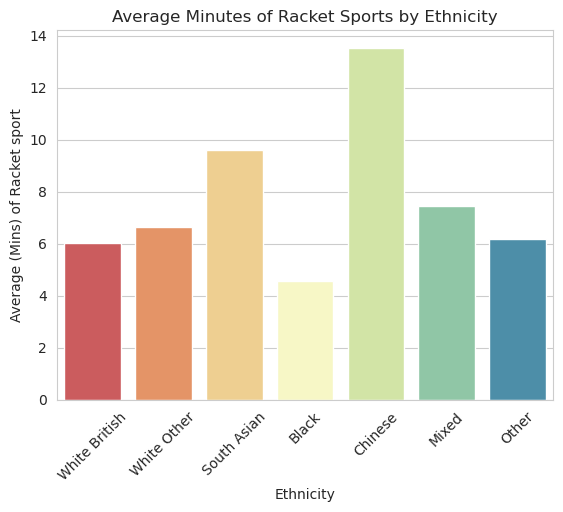

In [9]:


# Calculate the average 'Mins_Badminton_Perweek' by ethnicity
avg_mins_per_week = df_imputed.groupby('Ethnicity')['Duration_Racket'].mean().reset_index()

# Set seaborn style
sns.set_style("whitegrid")

labels = ['White British','White Other','South Asian','Black','Chinese','Mixed','Other']

# Plot the average 'Mins_Badminton_Perweek' by ethnicity
sns.barplot(data=avg_mins_per_week, x=labels, y='Duration_Racket', palette = 'Spectral')
plt.xlabel('Ethnicity')
plt.ylabel('Average (Mins) of Racket sport')
plt.title('Average Minutes of Racket Sports by Ethnicity')
plt.xticks(rotation=45)
plt.show()

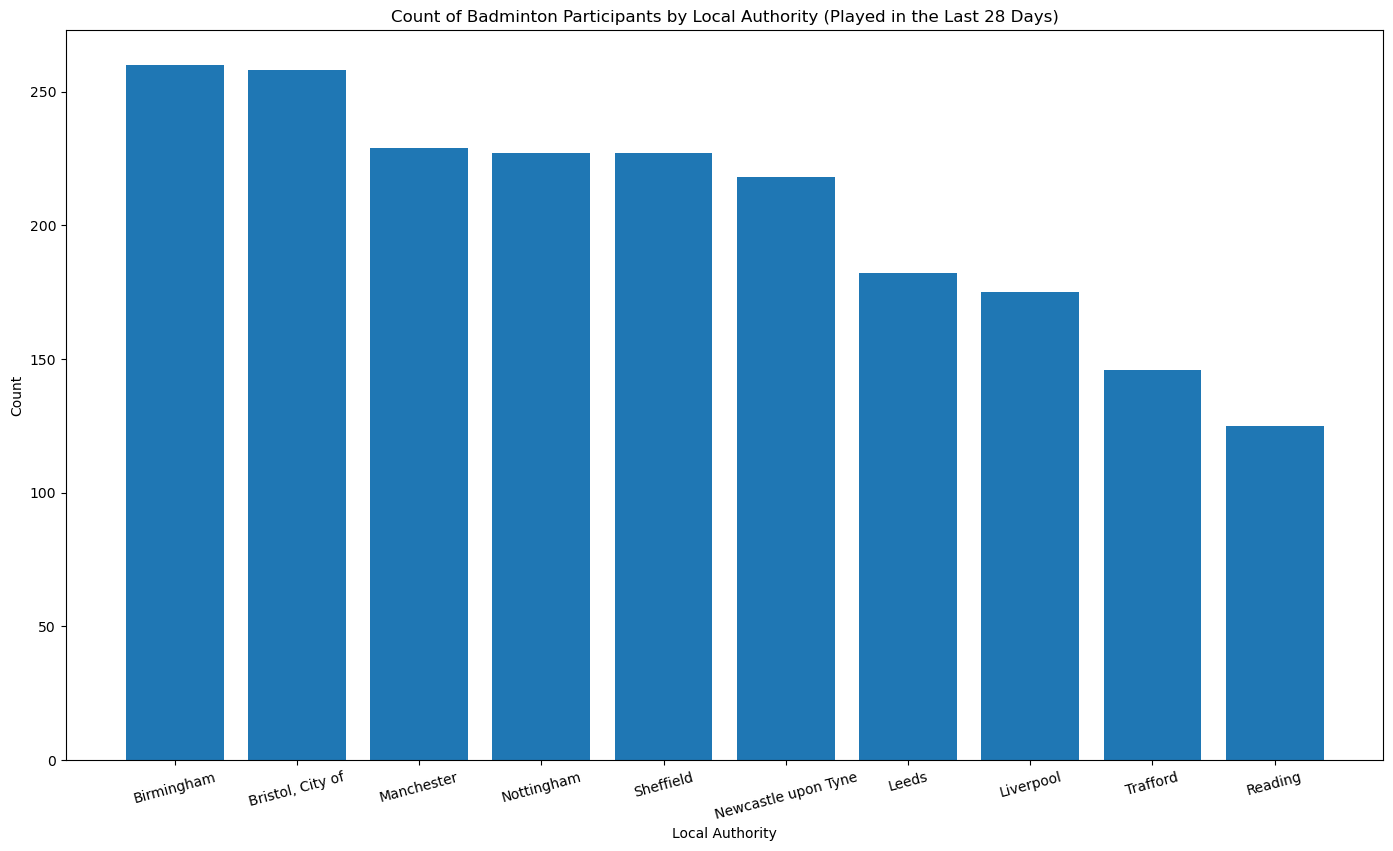

In [25]:
C = df_imputed[df_imputed['Time'] != 6]
plays_counts = C[C['Plays_badminton'] == 1].groupby('LA').size()

# Sort the counts in descending order and get the top 10
top_10_plays = plays_counts.nlargest(10)

# Subset the DataFrame for the top 10 'LA' values
top_10_df = C[C['LA'].isin(top_10_plays.index)]

labels = ['Birmingham', 'Bristol, City of', 'Manchester', 'Nottingham', 'Sheffield', 'Newcastle upon Tyne',
          'Leeds', 'Liverpool', 'Trafford', 'Reading']
# Create an array of index values for the x-axis
x_values = np.arange(len(top_10_plays))

# Set the figure size
plt.figure(figsize=(17, 10))  # Adjust the width and height as desired

# Plot the count of '1s' by the top 10 'LA' values
plt.bar(x_values, top_10_plays.values)
plt.xlabel('Local Authority')
plt.ylabel('Count')
plt.title('Count of Badminton Participants by Local Authority (Played in the Last 28 Days)')
plt.xticks(x_values, labels, rotation=15)
# Adjust the bottom margin to increase the gap between x-label and x-ticks
plt.subplots_adjust(bottom=0.15)  # Adjust the value as desired

# Show the plot
plt.show()

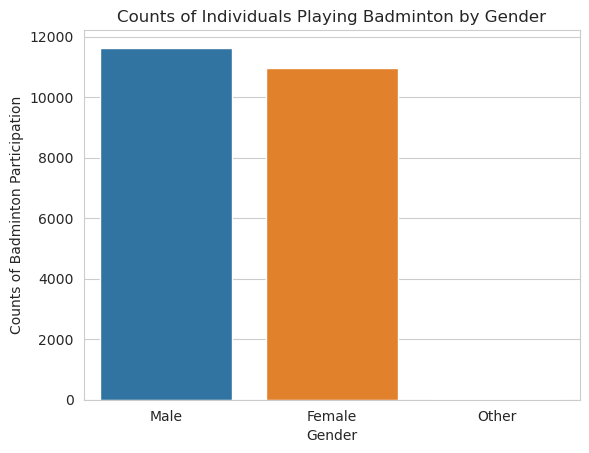

In [11]:
# Count the instances of 1 for 'Plays_badminton' by gender
counts_plays_badminton = df_imputed[df_imputed['Plays_badminton'] == 1]['Gender'].value_counts().reset_index()
counts_plays_badminton.columns = ['Gender', 'Count']

# Set seaborn style
sns.set_style("whitegrid")

 
labels = ['Male', 'Female', 'Other']

# Plot the count of individuals who play badminton (with a value of 1) by gender
sns.barplot(data=counts_plays_badminton, x=labels, y='Count')

plt.xlabel('Gender')
plt.ylabel('Counts of Badminton Participation')
plt.title('Counts of Individuals Playing Badminton by Gender')
plt.xticks(rotation=0)
plt.show()

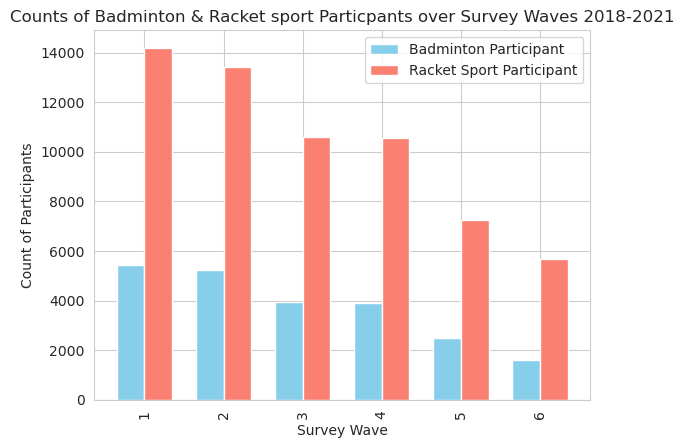

In [12]:
# Filter the DataFrame for instances with a value of 1 for 'Plays_badminton'
df_badminton = df_imputed[df_imputed['Plays_badminton'] == 1]

# Filter the DataFrame for instances with a value of 1 for 'Plays_racket'
df_racket = df_imputed[df_imputed['Plays_racket'] == 1]

# Count the occurrences of 1 for 'Plays_badminton' over the variable 'Time'
counts_badminton = df_badminton['Time'].value_counts().reset_index()
counts_badminton.columns = ['Time', 'Count']

# Count the occurrences of 1 for 'Plays_racket' over the variable 'Time'
counts_racket = df_racket['Time'].value_counts().reset_index()
counts_racket.columns = ['Time', 'Count']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the x-axis ticks
x = np.arange(len(counts_badminton))

# Define less harsh colors for the bars
colors = ['skyblue', 'salmon']

# Plot the counts of 1 for 'Plays_badminton' over the variable 'Time' with less harsh colors
plt.bar(x, counts_badminton['Count'], width=bar_width, color=colors[0], label='Badminton Participant')

# Plot the counts of 1 for 'Plays_racket' over the variable 'Time' with less harsh colors
plt.bar(x + bar_width, counts_racket['Count'], width=bar_width, color=colors[1], label='Racket Sport Participant')

# Set the tick positions and labels for X-axis
plt.xticks(x + bar_width/2, counts_badminton['Time'], rotation=90)

plt.xlabel('Survey Wave')
plt.ylabel('Count of Participants')
plt.title("Counts of Badminton & Racket sport Particpants over Survey Waves 2018-2021")
plt.legend()
plt.show()

In [11]:
# Creating a sweet Viz Report 

# importing sweetviz
import sweetviz as sv
#analyzing the dataset
adult_report = sv.analyze(df_imputed)
#display the report
adult_report.show_html('adult.html')

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and wil

KeyboardInterrupt: 

In [ ]:
adult_report.show_html()

In [5]:
df_imputed

,Frequency_Racket,Duration_Racket,Mins_Badminton_Perweek,Badminton_Duration,Badminton_12_Momths,Time,IMD,Serial,LA,Age,Child,Diability,Education,Ethnicity,Gender,Workstatus,BMI,Badminton_Frequency,Plays_badminton,Plays_racket
0,0.0,0.0,0.0,0.0,0.0,1,10.0,160480126774181.0,155.0,8.0,1.0,2.0,1.0,7.0,2.0,5.0,2.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1,6.0,151160011004881.0,123.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1,10.0,151160011005981.0,123.0,4.0,3.0,2.0,3.0,1.0,2.0,6.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1,9.0,151160011007481.0,123.0,7.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1,9.0,151160011007482.0,123.0,7.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117750,0.0,0.0,0.0,0.0,0.0,6,6.0,211090336822241.0,174.0,2.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,0.0,0.0,0.0
1117751,0.0,0.0,0.0,0.0,0.0,6,9.0,211090336822991.0,78.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0
1117752,0.0,0.0,0.0,0.0,0.0,6,5.0,211090336823721.0,78.0,6.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
1117753,0.0,0.0,0.0,0.0,0.0,6,5.0,211090336823722.0,78.0,6.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0


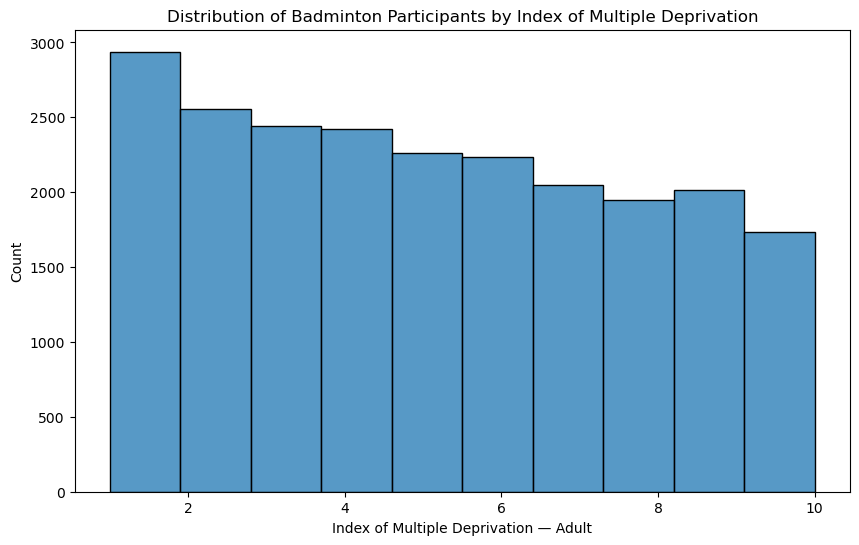

In [7]:
# Filter the DataFrame for badminton_onceweek values equal to 1
df_badminton_onceweek_1 = df_imputed[df_imputed['Plays_badminton'] == 1]

# Plotting the histogram of IMD_child for badminton_onceweek values equal to 1
plt.figure(figsize=(10, 6))
sns.histplot(data=df_badminton_onceweek_1, x='IMD', bins=10)
plt.xlabel('Index of Multiple Deprivation — Adult')
plt.ylabel('Count')
plt.title('Distribution of Badminton Participants by Index of Multiple Deprivation')
plt.show()

## Correlation Matrix

/tmp/ipykernel_137/2684340971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_imputed.corr()


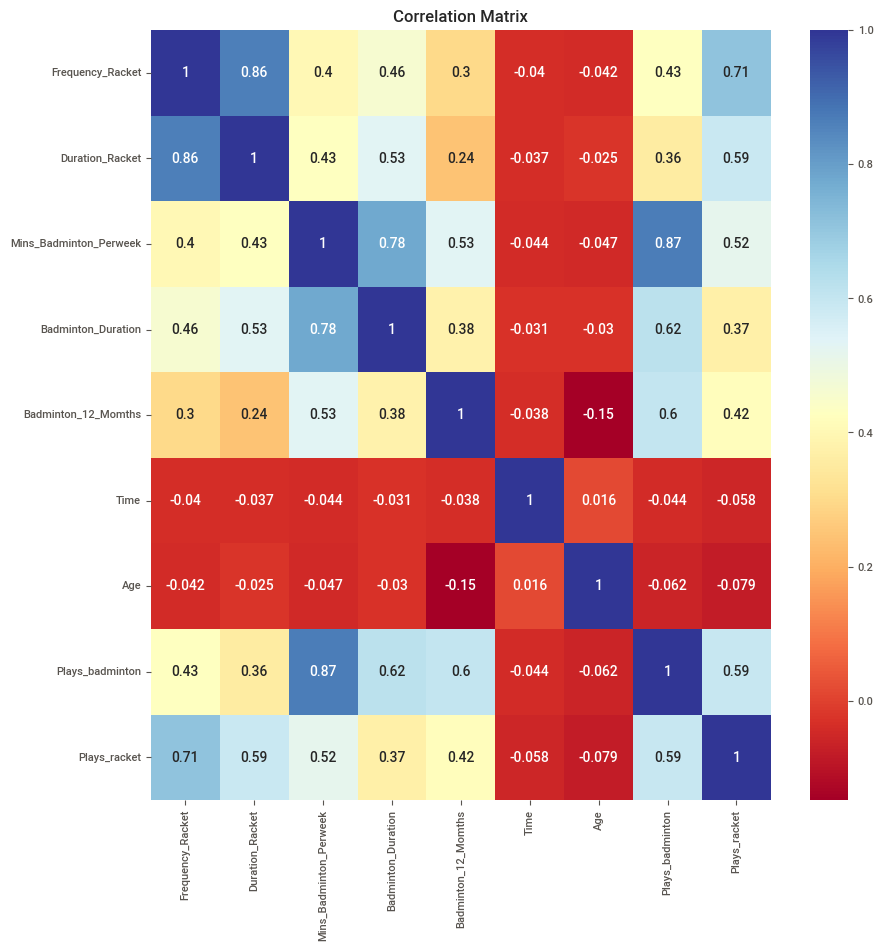

In [12]:
# Compute the correlation matrix
correlation_matrix = df_imputed.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")  # Plot the heatmap
plt.title("Correlation Matrix")  # Set the title of the plot
plt.show()  # Show the plot

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame named 'data' containing your data

# Select the numerical features for VIF calculation
numerical_features = df_imputed.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = numerical_features.columns
vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

# Print the VIF results
print(vif)

                  Feature       VIF
0        Frequency_Racket  5.776531
1         Duration_Racket  4.843502
2  Mins_Badminton_Perweek  7.046763
3      Badminton_Duration  3.144071
4     Badminton_12_Momths  1.666963
5                    Time  3.594133
6                     Age  3.585573
7         Plays_badminton  5.730929
8            Plays_racket  2.886084


Most of these varaibles won't be used in the final models so can ignore the ones that are high like racket as they are only used for visualisations

In [14]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'data' containing your data

# Select the categorical features for multicollinearity test
categorical_features = df_imputed.select_dtypes(include=['object'])

# Create an empty DataFrame to store the chi-square test results
chi2_results = pd.DataFrame(index=categorical_features.columns, columns=categorical_features.columns)

# Perform chi-square test of independence for each pair of features
for feature1 in categorical_features.columns:
    for feature2 in categorical_features.columns:
        if feature1 != feature2:
            contingency_table = pd.crosstab(df_imputed[feature1], df_imputed[feature2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_results.loc[feature1, feature2] = p_value

# Print the chi-square test results
print(chi2_results)

                      LA Child Diability Education Ethnicity Gender  \
LA                   NaN   0.0       0.0       0.0       0.0    0.0   
Child                0.0   NaN       0.0       0.0       0.0    0.0   
Diability            0.0   0.0       NaN       0.0       0.0    0.0   
Education            0.0   0.0       0.0       NaN       0.0    0.0   
Ethnicity            0.0   0.0       0.0       0.0       NaN    0.0   
Gender               0.0   0.0       0.0       0.0       0.0    NaN   
Workstatus           0.0   0.0       0.0       0.0       0.0    0.0   
BMI                  0.0   0.0       0.0       0.0       0.0    0.0   
Badminton_Frequency  0.0   0.0       0.0       0.0       0.0    0.0   

                    Workstatus  BMI Badminton_Frequency  
LA                         0.0  0.0                 0.0  
Child                      0.0  0.0                 0.0  
Diability                  0.0  0.0                 0.0  
Education                  0.0  0.0                 0.0  

## Maps

In [26]:
shape = pd.read_csv('/project/local-authority-england.csv')

# Remove the extra '0' for single-digit numbers
shape['LA_code'] = shape['reference'].str[-3:]

# Remove leading '0' if the number is a single digit
shape['LA_code'] = shape['LA_code'].apply(lambda x: x[-2:].lstrip('0'))
shape = shape.loc[:, ['geometry', 'LA_code']]

In [27]:
shape.dtypes

dataset                      object
end-date                    float64
entity                        int64
entry-date                   object
geojson                     float64
geometry                     object
name                         object
organisation-entity           int64
point                        object
prefix                       object
reference                    object
start-date                  float64
typology                     object
categories                  float64
documentation-url           float64
geography                   float64
legislation                 float64
local-authority-district    float64
notes                       float64
organisation                float64
LA                          float64
dtype: object

In [28]:
shape = shape[["LA", "geometry", "name"]]

In [29]:
shape

,LA,geometry,name
0,1.0,"MULTIPOLYGON (((-0.281432 50.830078,-0.281511 ...",Adur
1,2.0,"MULTIPOLYGON (((-3.290362 54.859318,-3.290329 ...",Allerdale
2,3.0,"MULTIPOLYGON (((-1.494393 53.132435,-1.495366 ...",Amber Valley
3,4.0,"MULTIPOLYGON (((-0.750280 50.756953,-0.750197 ...",Arun
4,5.0,"MULTIPOLYGON (((-1.288738 53.171396,-1.288758 ...",Ashfield
...,...,...,...
321,322.0,"MULTIPOLYGON (((-2.225272 52.360435,-2.225413 ...",Wychavon
322,323.0,"MULTIPOLYGON (((-0.806326 51.780217,-0.806672 ...",Wycombe
323,324.0,"MULTIPOLYGON (((-2.942211 53.851182,-2.941789 ...",Wyre
324,325.0,"MULTIPOLYGON (((-2.291446 52.451355,-2.291208 ...",Wyre Forest


In [31]:
maps = C

maps

,Frequency_Racket,Duration_Racket,Mins_Badminton_Perweek,Badminton_Duration,Badminton_12_Momths,Time,IMD,Serial,LA,Age,Child,Diability,Education,Ethnicity,Gender,Workstatus,BMI,Badminton_Frequency,Plays_badminton,Plays_racket
0,0.0,0.0,0.0,0.0,0.0,1,10.0,160480126774181.0,155.0,8.0,1.0,2.0,1.0,7.0,2.0,5.0,2.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1,6.0,151160011004881.0,123.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1,10.0,151160011005981.0,123.0,4.0,3.0,2.0,3.0,1.0,2.0,6.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1,9.0,151160011007481.0,123.0,7.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1,9.0,151160011007482.0,123.0,7.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940477,0.0,0.0,0.0,0.0,0.0,5,9.0,201090333142822.0,310.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0
940478,0.0,0.0,0.0,0.0,0.0,5,7.0,201090333143571.0,310.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0
940479,0.0,0.0,0.0,0.0,0.0,5,6.0,201090333144311.0,310.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0
940480,0.0,0.0,0.0,0.0,0.0,5,9.0,201090333144801.0,310.0,5.0,1.0,2.0,1.0,6.0,1.0,1.0,3.0,0.0,0.0,0.0


In [32]:


# Remove the '.0' at the end of values in the 'LA' column
shape['LA'] = shape['LA'].astype(str).str.rstrip('.0')

shape


,LA,geometry,name
0,1,"MULTIPOLYGON (((-0.281432 50.830078,-0.281511 ...",Adur
1,2,"MULTIPOLYGON (((-3.290362 54.859318,-3.290329 ...",Allerdale
2,3,"MULTIPOLYGON (((-1.494393 53.132435,-1.495366 ...",Amber Valley
3,4,"MULTIPOLYGON (((-0.750280 50.756953,-0.750197 ...",Arun
4,5,"MULTIPOLYGON (((-1.288738 53.171396,-1.288758 ...",Ashfield
...,...,...,...
321,322,"MULTIPOLYGON (((-2.225272 52.360435,-2.225413 ...",Wychavon
322,323,"MULTIPOLYGON (((-0.806326 51.780217,-0.806672 ...",Wycombe
323,324,"MULTIPOLYGON (((-2.942211 53.851182,-2.941789 ...",Wyre
324,325,"MULTIPOLYGON (((-2.291446 52.451355,-2.291208 ...",Wyre Forest


In [33]:
pip install geopandas

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
  Using cached pyproj-3.6.0-cp39-cp39-manylinux_2_17_x

In [34]:
maps['LA'] = maps['LA'].astype(str).str.rstrip('.0')

/tmp/ipykernel_142/2129896202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps['LA'] = maps['LA'].astype(str).str.rstrip('.0')


In [35]:

import geopandas as gpd
from shapely.wkt import loads

# Assuming you have a DataFrame called 'me' with a 'geometry' column as string

converter = np.vectorize(loads)
shape['geometry'] = converter(shape['geometry'])

# Create a GeoDataFrame with the converted geometry column
gdf = gpd.GeoDataFrame(shape, geometry='geometry')

# Verify the updated data type
print(gdf.dtypes)



LA            object
geometry    geometry
name          object
dtype: object


In [36]:
shape.dtypes

LA          object
geometry    object
name        object
dtype: object

In [17]:
maps.dtypes

Frequency_Racket          float64
Duration_Racket           float64
Mins_Badminton_Perweek    float64
Badminton_Duration        float64
Badminton_12_Momths       float64
Time                        int64
IMD                        object
Serial                     string
LA                         object
Age                       float64
Child                      object
Diability                  object
Education                  object
Ethnicity                  object
Gender                     object
Workstatus                 object
BMI                        object
Badminton_Frequency        object
Plays_badminton           float64
Plays_racket              float64
dtype: object

In [37]:
me = maps.merge(shape, left_on='LA',right_on='LA')

In [38]:
me_sample = me.sample(n= 100000, random_state=42)


In [39]:
# Create a GeoDataFrame with the converted geometry column
gdf1 = gpd.GeoDataFrame(me_sample, geometry='geometry')

Where there is a good badminton court and player it attracts players, does not seem class realted. 

In [17]:
sportshall = pd.read_csv('/project/SportsHall.csv')

geo = pd.read_csv('/project/Geographic.csv')

In [18]:
geo = geo[['FACILITYID','Latitude','Longitude']]

In [19]:
sportshall.columns

Index(['FacilityID', 'Area', 'Badminton Courts', 'Basketball Courts',
       'Clearance Exists - Ball / Shuttlecock', 'Cricket Nets',
       'Dimensions Estimate', 'Floor Matting', 'Gymnastics/Trampoline Use',
       'Length', 'Moveable Balance Apparatus', 'Moveable Large Apparatus',
       'Moveable Rebound Apparatus', 'Moveable Trampolines', 'Netball Courts',
       'Small Apparatus', 'Swinging And Hanging Apparatus',
       'Volleyball Courts', 'Width', 'Five-A-Side Pitches', 'Futsal Courts'],
      dtype='object')

In [20]:
# Filter rows where "badminton Courts" value is more than 1
sportshall = sportshall[sportshall['Badminton Courts'] > 0]


In [21]:
sportshall = sportshall[['FacilityID','Badminton Courts']]

In [22]:
geo.rename(columns={'FACILITYID': 'FacilityID'}, inplace=True)

In [23]:
sporthall_merged = pd.merge(sportshall, geo, on="FacilityID", how="inner")
# Merge the DataFrames based on "FacilityID" column
sporthall_merged

,FacilityID,Badminton Courts,Latitude,Longitude
0,2000003,6,51.490948,0.291765
1,2000007,4,50.859143,-0.089653
2,2000019,8,53.263713,-2.891404
3,2000022,2,50.423253,-4.214048
4,2000034,4,51.586277,0.462693
...,...,...,...,...
11480,30030074,1,52.591345,-1.147301
11481,30030161,4,51.811427,-0.330650
11482,30030205,1,51.978176,-0.734255
11483,30030217,4,54.012992,-1.720875


In [24]:
pip install shapely

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
Note: you may need to restart the kernel to use updated packages.


In [25]:
from shapely.geometry import Point

# Assume you have a DataFrame called sporthall_merged with columns including 'Longitude' and 'Latitude'

# Create a GeoDataFrame from the existing DataFrame
geometry = [Point(xy) for xy in zip(sporthall_merged.Longitude, sporthall_merged.Latitude)]
sportshalls_gdf = gpd.GeoDataFrame(sporthall_merged, geometry=geometry)

# Print the GeoDataFrame
print(sportshalls_gdf)


       FacilityID  Badminton Courts   Latitude  Longitude  \
0         2000003                 6  51.490948   0.291765   
1         2000007                 4  50.859143  -0.089653   
2         2000019                 8  53.263713  -2.891404   
3         2000022                 2  50.423253  -4.214048   
4         2000034                 4  51.586277   0.462693   
...           ...               ...        ...        ...   
11480    30030074                 1  52.591345  -1.147301   
11481    30030161                 4  51.811427  -0.330650   
11482    30030205                 1  51.978176  -0.734255   
11483    30030217                 4  54.012992  -1.720875   
11484    30030260                 1  51.422497  -0.294361   

                        geometry  
0       POINT (0.29176 51.49095)  
1      POINT (-0.08965 50.85914)  
2      POINT (-2.89140 53.26371)  
3      POINT (-4.21405 50.42325)  
4       POINT (0.46269 51.58628)  
...                          ...  
11480  POINT (-1.14730

In [26]:
pip install cartopy

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements t

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Calculate the count of '1' values by LA
counts = gdf1.groupby('LA')['Plays_badminton'].sum()

# Normalize the counts to be in the range [0, 1]
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

# Create a custom color map with varying darkness based on the normalized counts
cmap = cm.Blues
colors = cmap(normalized_counts)

# Create a dictionary to map LA values to colors
color_dict = dict(zip(counts.index, colors))

# Plot the choropleth map with color based on the number of '1' values
fig, ax = plt.subplots(figsize=(20, 8))
gdf1.plot(ax=ax, linewidth=0.8, edgecolor='0.8', facecolor=gdf1['LA'].map(color_dict))

# Create a colorbar legend
norm = mcolors.Normalize(vmin=counts.min(), vmax=counts.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to ensure correct color mapping
cbar = plt.colorbar(sm)

# Customize the plot
ax.set_title('Choropleth Map: Plays Badminton')
ax.set_axis_off()

# Show the plot
plt.show()

In [42]:
# Create a DataFrame from the data
df = pd.DataFrame(normalized_counts)

# Sort the DataFrame based on the "Counts" column in descending order
sorted_df = df.sort_values("Plays_badminton", ascending=False)

sorted_df.head(60)


#Bath
#Adur
#Birgihman
#Amber Valley
#Bolsover
#bracknell Forest


,Plays_badminton
LA,
1,1.000000
19,0.967213
3,0.754098
23,0.754098
16,0.672131
26,0.540984
27,0.508197
2,0.491803
17,0.426230


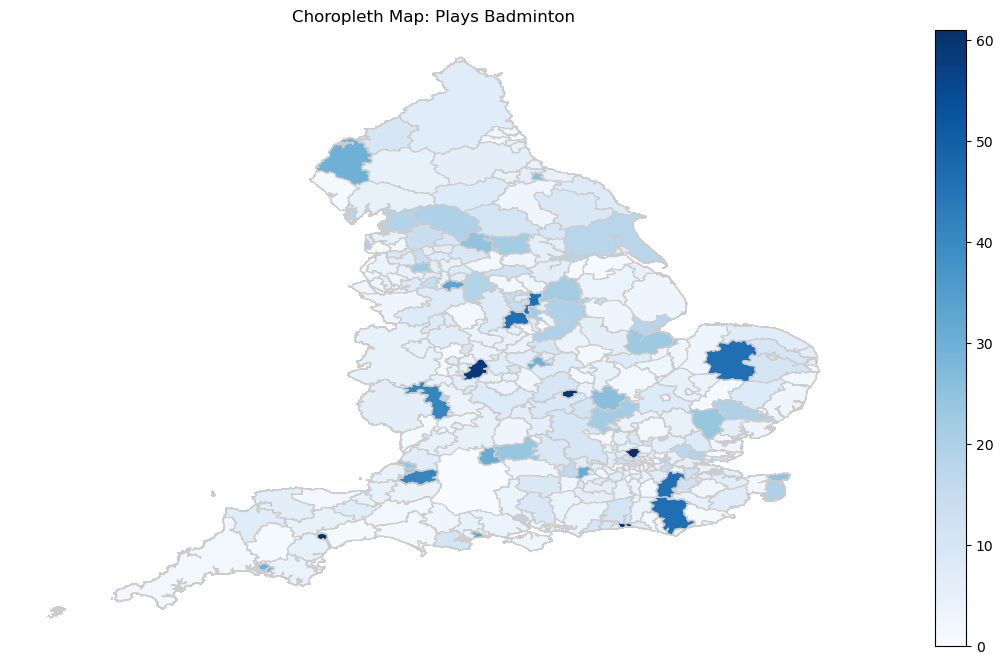

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Calculate the count of '1' values by LA
counts = gdf1.groupby('LA')['Plays_badminton'].sum()

# Fill missing LAs with 0 counts
all_las = gdf1['LA'].unique()
missing_las = set(all_las) - set(counts.index)
counts = counts.reindex(all_las, fill_value=0)

# Normalize the counts to be in the range [0, 1]
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

# Create a custom color map with varying darkness based on the normalized counts
cmap = cm.Blues
colors = cmap(normalized_counts)

# Create a dictionary to map LA values to colors
color_dict = dict(zip(counts.index, colors))

# Set missing LAs in the GeoDataFrame to 0
gdf1['Plays_badminton'] = gdf1['Plays_badminton'].fillna(0)

# Plot the choropleth map with color based on the number of '1' values
fig, ax = plt.subplots(figsize=(20, 8))
gdf1.plot(ax=ax, linewidth=0.8, edgecolor='0.8', facecolor=gdf1['LA'].map(color_dict))

# Create a colorbar legend
norm = mcolors.Normalize(vmin=counts.min(), vmax=counts.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to ensure correct color mapping
cbar = plt.colorbar(sm)

# Customize the plot
ax.set_title('Choropleth Map: Plays Badminton')
ax.set_axis_off()

# Show the plot
plt.show()

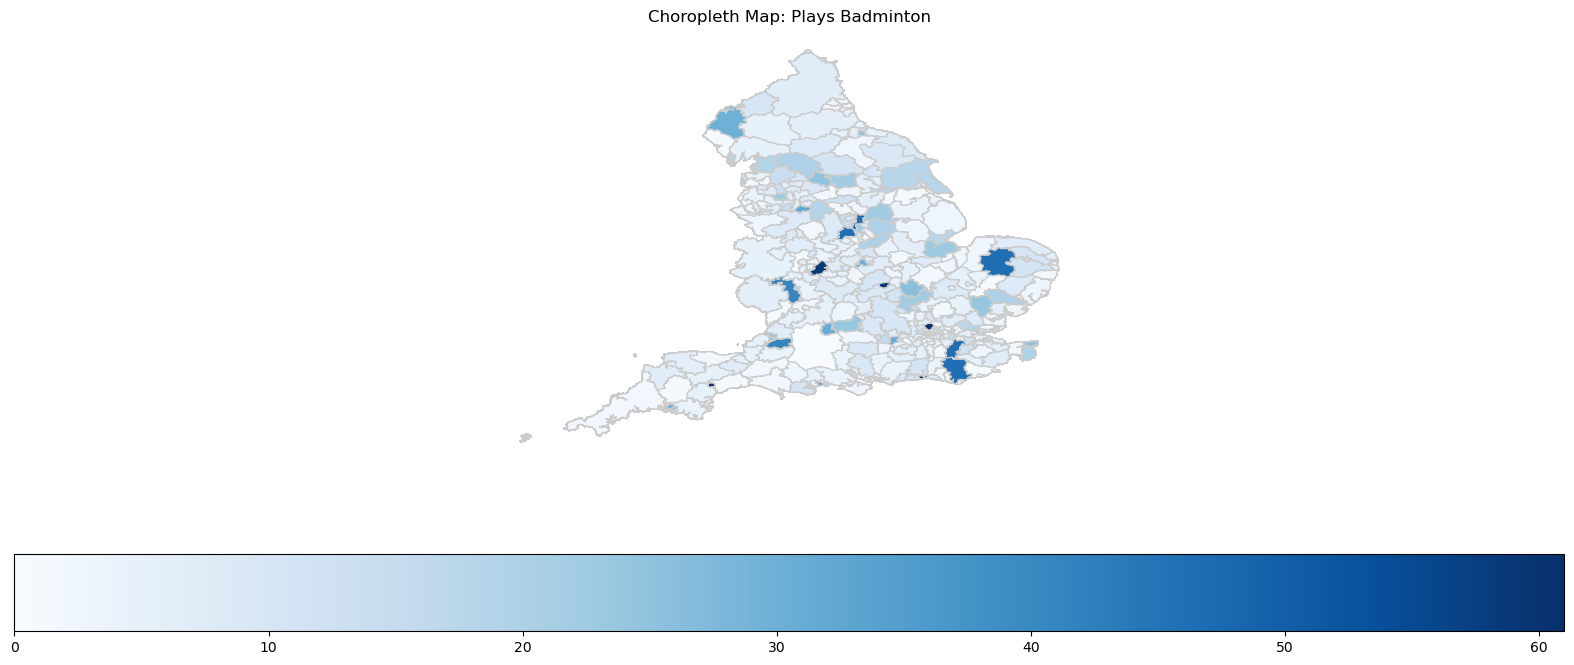

In [43]:
# Plot the choropleth map with color based on the number of '1' values
fig, ax = plt.subplots(figsize=(20, 8))
gdf1.plot(ax=ax, linewidth=0.8, edgecolor='0.8', facecolor=gdf1['LA'].map(color_dict))

# Create a colorbar legend
norm = mcolors.Normalize(vmin=counts.min(), vmax=counts.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to ensure correct color mapping
cbar = plt.colorbar(sm, orientation='horizontal')  # Set the legend orientation to horizontal

# Customize the plot
ax.set_title('Choropleth Map: Plays Badminton')
ax.set_axis_off()

# Show the plot
plt.show()

/tmp/ipykernel_8638/2384772057.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  uk_basemap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


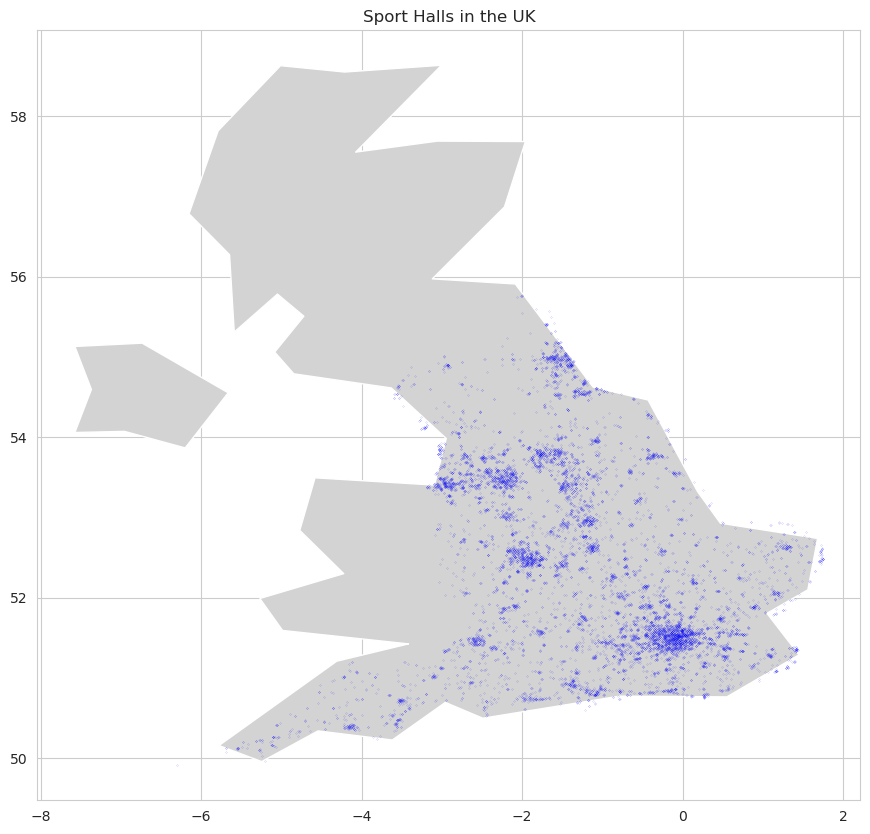

In [32]:
# Read the built-in geopandas basemap for the UK
uk_basemap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the basemap to only include the UK
uk_basemap = uk_basemap[uk_basemap['name'] == 'United Kingdom']

# Plot the points and the UK basemap
fig, ax = plt.subplots(figsize=(30, 10))
uk_basemap.plot(ax=ax, color='lightgray')
sportshalls_gdf.plot(ax=ax, color='blue', markersize=0.005)  # Adjust the markersize as desired

# Add title
ax.set_title("Sport Halls in the UK")

# Show the plot
plt.show()

In [34]:
sportshalls_gdf

,FacilityID,Badminton Courts,Latitude,Longitude,geometry
0,2000003,6,51.490948,0.291765,POINT (0.29176 51.49095)
1,2000007,4,50.859143,-0.089653,POINT (-0.08965 50.85914)
2,2000019,8,53.263713,-2.891404,POINT (-2.89140 53.26371)
3,2000022,2,50.423253,-4.214048,POINT (-4.21405 50.42325)
4,2000034,4,51.586277,0.462693,POINT (0.46269 51.58628)
...,...,...,...,...,...
11480,30030074,1,52.591345,-1.147301,POINT (-1.14730 52.59134)
11481,30030161,4,51.811427,-0.330650,POINT (-0.33065 51.81143)
11482,30030205,1,51.978176,-0.734255,POINT (-0.73425 51.97818)
11483,30030217,4,54.012992,-1.720875,POINT (-1.72087 54.01299)


In [45]:
import plotly.graph_objects as go

# Create a scattermapbox trace for your data points
data = go.Scattermapbox(
    lat=sportshalls_gdf['Latitude'],
    lon=sportshalls_gdf['Longitude'],
    mode='markers',
    marker=dict(
        size=4,
        color='lightblue'
    ),
    text=sportshalls_gdf['FacilityID'],
    name='Sport Halls'
)

# Create a layout for the map
layout = go.Layout(
    title='Sport Halls in the UK',
    mapbox=dict(
        center=dict(lat=52.3555, lon=-1.1743),
        style='carto-positron',
        zoom=6
    ),
    width=900,  # Adjust the width of the figure
    height=1000  # Adjust the height of the figure
)

# Create a figure and add the data and layout
fig = go.Figure(data=data, layout=layout)

# Show the interactive map
fig.show()